In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [13]:
dataDir='/media/pesong/e/dl_gaussian/data/gaussian/images'

dataType='val'
annFile='/media/pesong/e/dl_gaussian/data/gaussian/annotations/instances_{}2017.json'.format(dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...


Done (t=1.53s)
creating index...
index created!


In [19]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format('.  '.join(nms))) 

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
road.  person.  rider.  car.  truck.  bus.  motorcycle.  bicycle



[1]
4
frankfurt_000001_029236_leftImg8bit.png


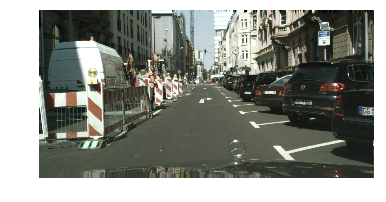

In [29]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['road'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds=[149])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(str(img['id']))

# load and display image
print(img['file_name'])
I = io.imread('%s/%s2017/%s'%(dataDir, dataType ,img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[16156]
[1]


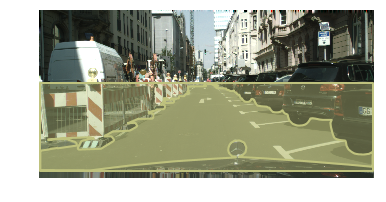

In [32]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'],catIds=catIds)
print(annIds)
anns = coco.loadAnns(annIds)
# anns = anns[2:3]
# print(anns)
print([ann['category_id'] for ann in anns])
# print([ann['bbox'] for ann in anns ])

coco.showAnns(anns, True)